In [89]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import root_mean_squared_error, r2_score, confusion_matrix, recall_score, precision_score, accuracy_score, f1_score

In [90]:
tabla = pd.read_csv("https://gitlab.com/dgtic5/res/-/raw/main/aprendizajeSupervizado/Alumni_Giving_Regression.csv")
tabla

,A,B,C,D,E,F
0,24,0.42,0.16,0.59,0.81,0.08
1,19,0.49,0.04,0.37,0.69,0.11
2,18,0.24,0.17,0.66,0.87,0.31
3,8,0.74,0.00,0.81,0.88,0.11
4,8,0.95,0.00,0.86,0.92,0.28
...,...,...,...,...,...,...
118,11,0.54,0.03,0.89,0.94,0.29
119,15,0.37,0.22,0.69,0.83,0.13
120,23,0.32,0.19,0.59,0.80,0.12
121,19,0.43,0.06,0.49,0.73,0.13


In [91]:
y = tabla["E"]
x = tabla.drop(["E"],axis=1)
xEntrenamiento, xPrueba, yEntrenamiento, yPrueba = train_test_split(x,y,test_size=0.2)

<h3>Regresión lineal</h3>

In [92]:
modelo = LinearRegression()
modelo.fit(xEntrenamiento, yEntrenamiento)
modelo.predict(xPrueba)

array([0.79552118, 0.72692167, 0.77070745, 0.85921154, 0.73732093,
       0.9759635 , 0.7316815 , 0.75833919, 0.7621129 , 0.95399364,
       0.7679723 , 1.00151355, 0.82113388, 0.87004725, 0.97581971,
       0.81576943, 0.81106791, 0.72900201, 0.94474938, 0.84031642,
       0.72306707, 0.9158784 , 0.82021674, 0.89851987, 0.91045177])

In [93]:
yPrueba

111    0.83
47     0.74
22     0.83
79     0.84
103    0.68
23     0.97
26     0.77
35     0.79
39     0.76
116    0.97
32     0.83
72     0.98
38     0.79
37     0.85
87     0.98
75     0.79
44     0.80
107    0.76
80     0.93
78     0.83
104    0.79
93     0.91
7      0.83
88     0.92
73     0.93
Name: E, dtype: float64

In [94]:
xEntrenamiento.columns

Index(['A', 'B', 'C', 'D', 'F'], dtype='object')

In [95]:
modelo.coef_

array([ 0.00113609, -0.05178616, -0.02458514,  0.4896006 ,  0.07822554])

In [96]:
modelo.intercept_

np.float64(0.5167322654680409)

<h3>RMSE</h3>

In [97]:
yPrediccion = modelo.predict(xPrueba)
rmse = root_mean_squared_error(yPrueba, yPrediccion)
print(f"RMSE: {rmse}")

RMSE: 0.03131857936000848


<h3>R2</h3>

In [98]:
yPrediccion = modelo.predict(xPrueba)
r2 = r2_score(yPrueba, yPrediccion)
print(f"RMSE: {r2}")

RMSE: 0.851924303573498


<h3>Regresión logística</h3>

In [99]:
tabla = pd.read_csv("https://gitlab.com/dgtic5/res/-/raw/main/aprendizajeSupervizado/Diabetes__Edited_.csv")
tabla

,A,B,C,D,E,F,G,H,I
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [100]:
y = tabla["I"]
x = tabla["B"].to_numpy().reshape(-1,1) ##Indicar explícitamente que es una matriz de una columna en vez de un vector.

xEntrenamiento, xPrueba, yEntrenamiento, yPrueba = train_test_split(x, y, test_size=0.2)

modelo = LogisticRegression()
modelo.fit(xEntrenamiento, yEntrenamiento)

LogisticRegression()

In [101]:
modelo.coef_

array([[0.03862727]])

In [102]:
yPrediccion = modelo.predict(xPrueba)
yPrediccion

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

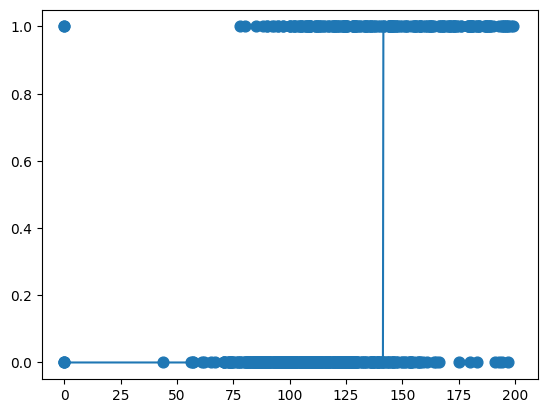

In [103]:
x_func = np.linspace(0,200,1000)
y_func = modelo.predict(x_func.reshape(-1, 1))
x_points = xEntrenamiento
y_points = yEntrenamiento

fig, ax = plt.subplots()
ax.plot(x_func,y_func)
ax.scatter(x_points,y_points,s=60)

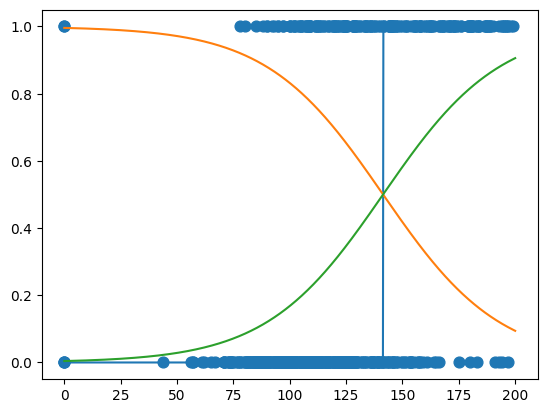

In [104]:
y_prob = modelo.predict_proba(x_func.reshape(-1, 1))

fig, ax = plt.subplots()
ax.plot(x_func,y_func)
ax.plot(x_func,y_prob)
ax.scatter(x_points,y_points,s=60)

<h3>Métricas de clasificación</h3>

In [105]:
confusion_matrix(yPrueba,yPrediccion)

array([[82, 16],
       [34, 22]])

In [106]:
accuracy_score(yPrueba,yPrediccion)

0.6753246753246753

In [107]:
precision_score(yPrueba,yPrediccion)

0.5789473684210527

In [108]:
recall_score(yPrueba,yPrediccion)

0.39285714285714285

In [109]:
f1_score(yPrueba,yPrediccion)

0.46808510638297873